In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import gc
from tqdm import tqdm

# Goal
This data challenge involves classification task. The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

The challenge is to correctly predict if a customer will click 'buy' on a website.

In [2]:
train = pd.read_csv('../input/classification-data-challenge/train.csv')
test = pd.read_csv('../input/classification-data-challenge/test.csv')

sub = pd.read_csv('../input/classification-data-challenge/submission.csv')

print(train.shape)
print(test.shape)


(4107, 87)
(1715, 86)


In [3]:
train

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,0,3,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,5816,13,1,2,3,3,0,2,0,7,5,2,3,3,3,5,2,4,4,2,0,0,2,2,4,2,2,1,4,2,9,0,6,0,3,7,2,3,4,3,0,0,4,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4103,5818,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,0,3,3,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
4104,5819,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,0,4,5,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4105,5820,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,0,3,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [4]:
def eda(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['miss'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    return summary

eda(train).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,4107,40,7,5,6,10,10,10,6,10,10,8,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,9,10,10,10,8,10,10,10,10,10,10,9,7,10,8,4,7,4,5,4,6,3,5,5,5,5,10,6,3,5,9,3,6,2,5,5,3,3,2,7,5,4,4,4,5,4,3,6,2,2,3,7,2,3,3,3,3,2


In [5]:
eda(test).T

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nlevel,1715,38,6,5,6,10,9,10,6,10,10,7,10,10,10,10,10,10,10,10,6,9,10,10,10,10,10,8,10,8,10,10,10,7,10,10,10,10,10,10,9,6,10,8,3,6,4,5,4,5,3,5,5,5,6,7,5,3,2,8,1,5,2,7,4,2,2,2,4,4,3,2,4,4,4,3,5,2,2,3,5,1,3,4,2,2


# Target

In [6]:
train['Buy'].value_counts()/len(train)

0    0.939615
1    0.060385
Name: Buy, dtype: float64

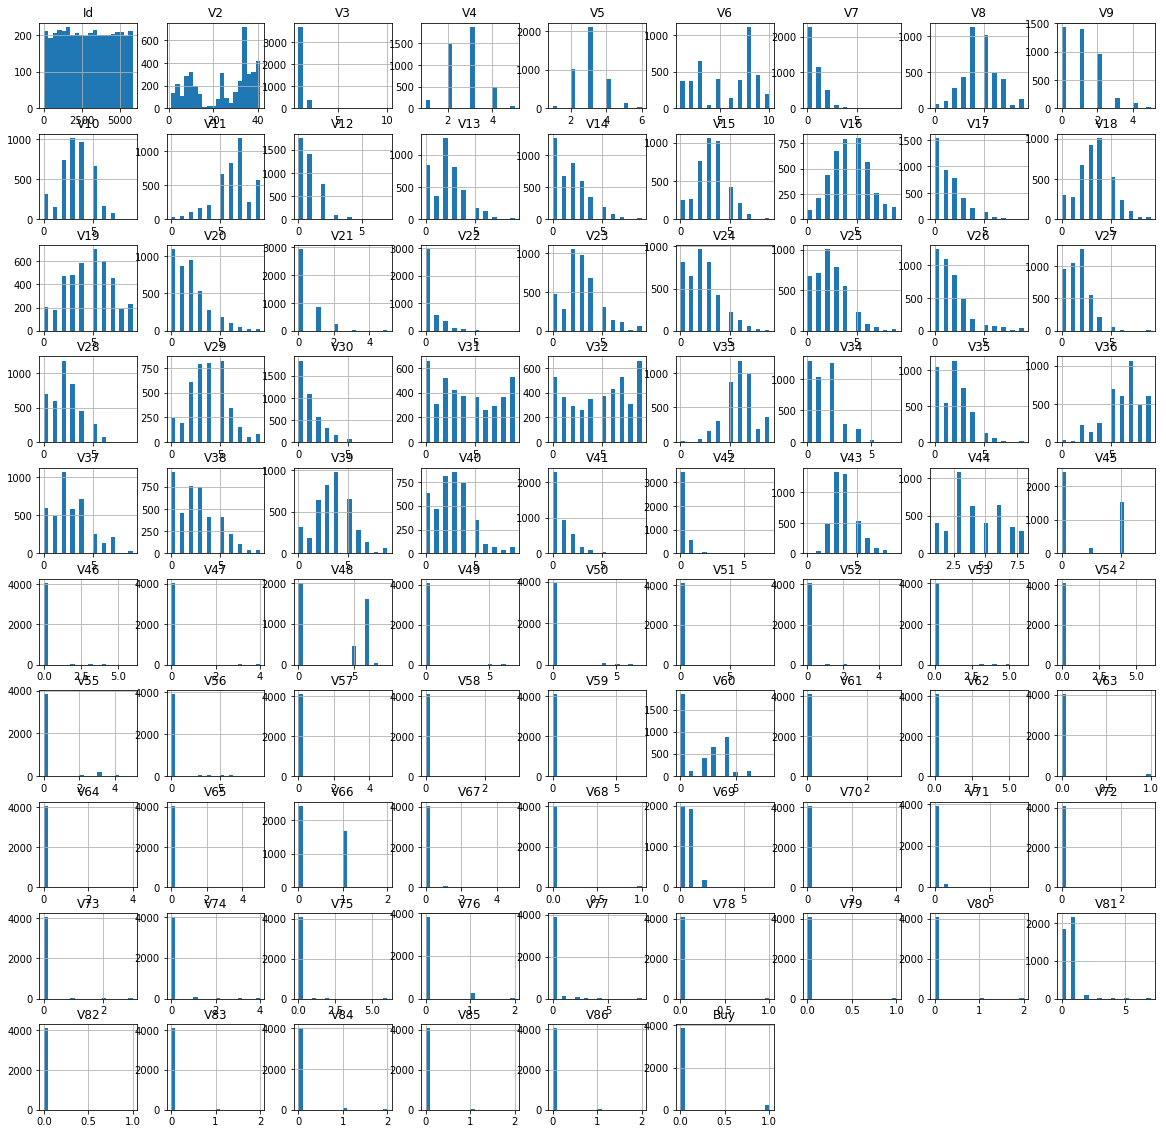

In [7]:
train.hist(figsize = (20,20), bins = 20)
plt.show()

# Correlation Analysis

In [8]:
train.corr()['Buy'].abs().sort_values(ascending = False)[:30]

Buy    1.000000
V83    0.156455
V48    0.153422
V69    0.141662
V62    0.137874
V44    0.100881
V43    0.100674
V17    0.094038
V19    0.093743
V45    0.091047
V60    0.086303
V38    0.082602
V66    0.081347
V31    0.078772
V86    0.078570
V32    0.077900
V2     0.077316
V35    0.076628
V6     0.075875
V41    0.071340
V65    0.069814
V26    0.069003
V36    0.068036
V33    0.067783
V11    0.067428
V37    0.067109
V20    0.065525
V40    0.063148
V25    0.059413
V30    0.059166
Name: Buy, dtype: float64

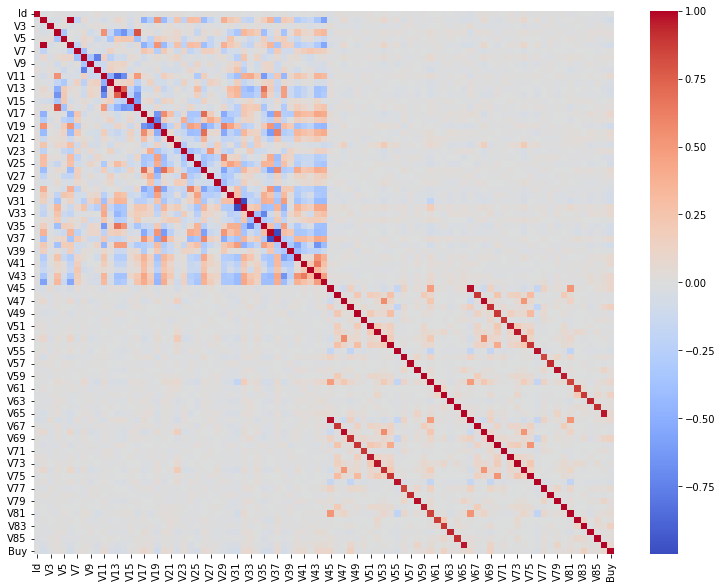

In [9]:
plt.figure(figsize = (13,10))
sns.heatmap(train.corr(), cmap = 'coolwarm')
plt.show()

# Columns with high correlation

In [10]:
thr = 0.8
corr_matrix = train.drop(['Id','Buy'], axis = 1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [c for c in upper.columns if any(upper[c] > thr)]
to_drop

['V6',
 'V13',
 'V32',
 'V37',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86']

In [11]:
fea = [f for f in train.columns if 'V' in f and (f not in to_drop)]
print(len(fea))

60


# Target v.s. Features

60it [00:00, 309.59it/s]


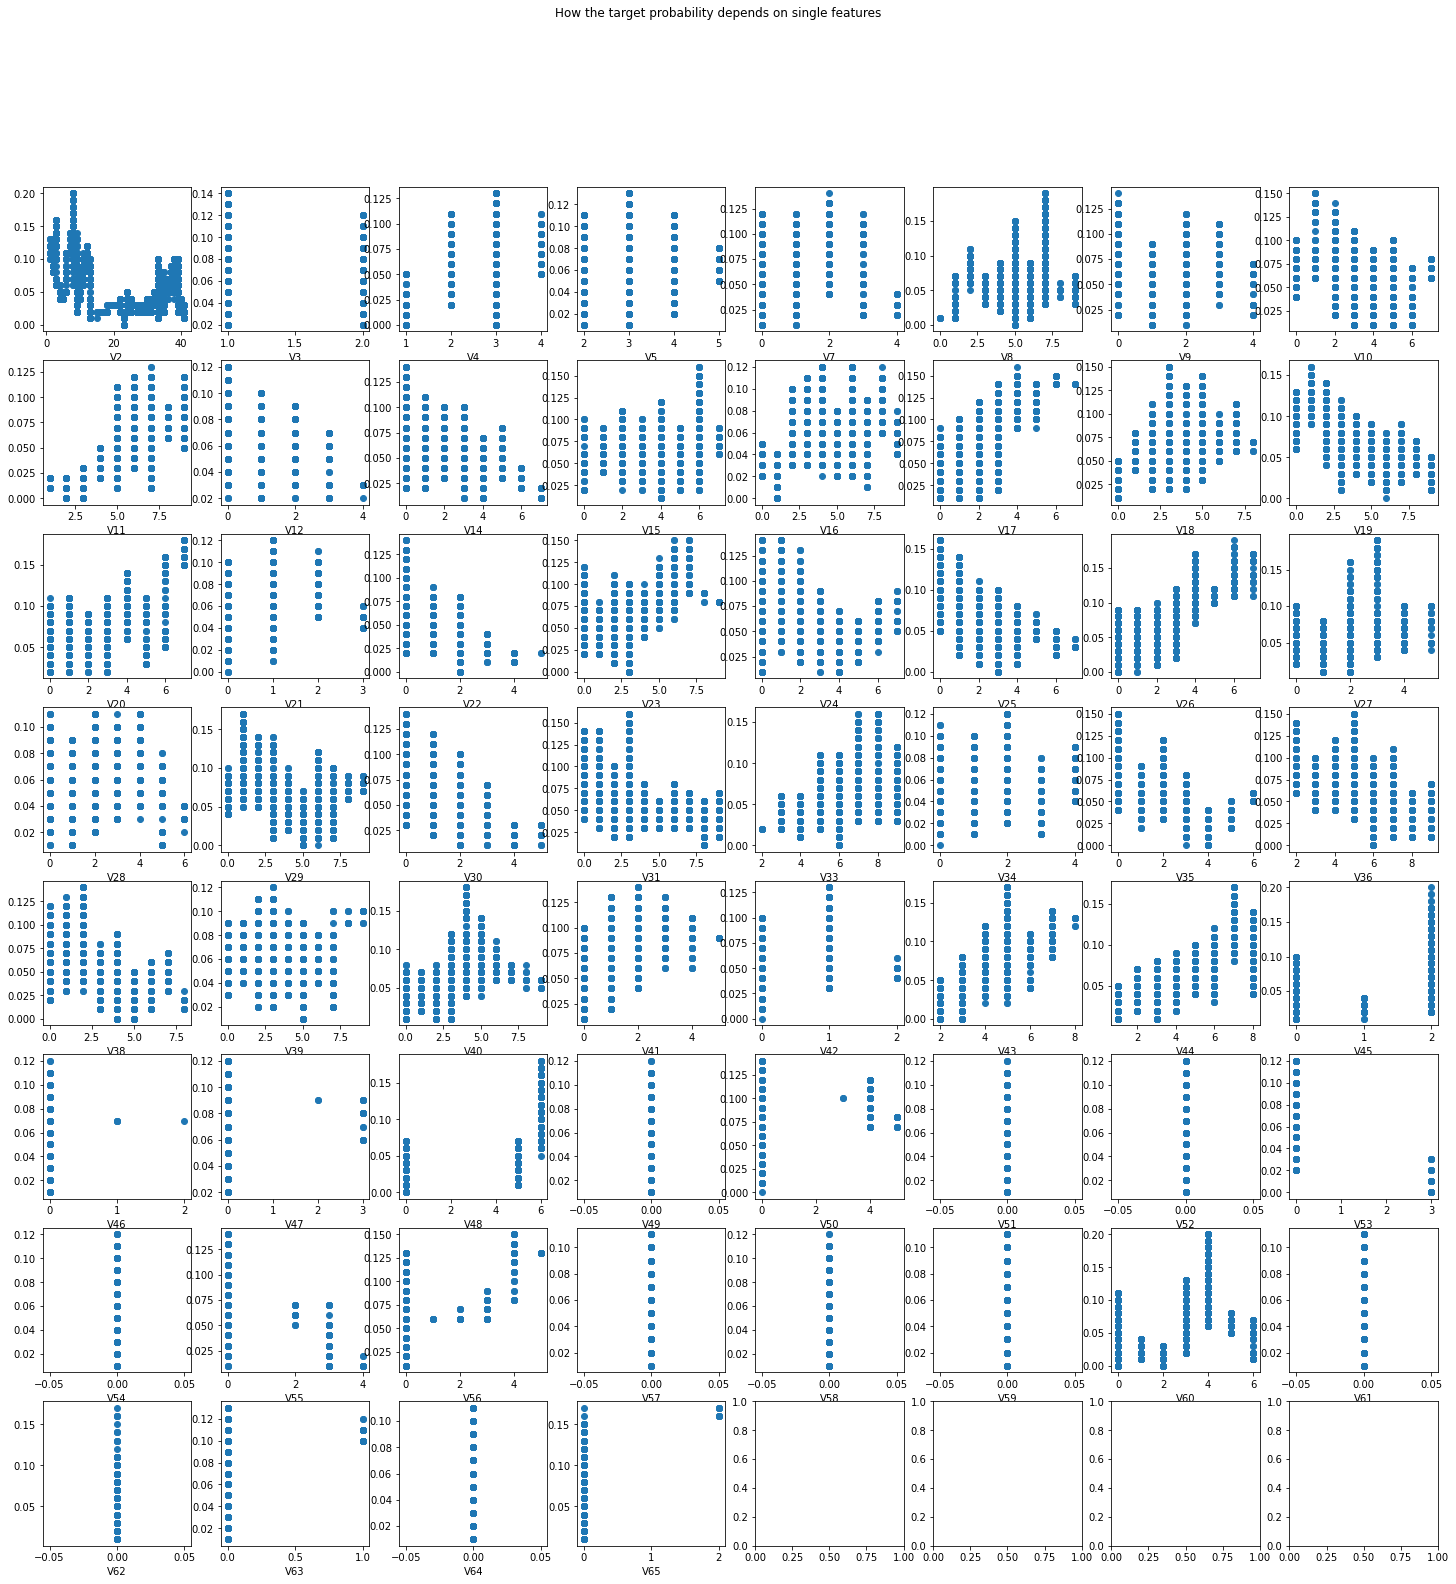

CPU times: user 7.06 s, sys: 205 ms, total: 7.27 s
Wall time: 7.04 s


In [12]:
%%time

fig, axe = plt.subplots(8,8, figsize = (25,25))
for f, ax in tqdm(zip(fea, axe.ravel())):
    tmp = train[[f, 'Buy']].sort_values(by = f)
    ax.scatter(tmp[f], tmp.Buy.rolling(100, center = True).mean())
    ax.set_xlabel(f'{f}')
plt.suptitle('How the target probability depends on single features')
plt.show()    

# LGBM

In [13]:
X_train = train.drop(['Id','Buy'], axis = 1)
y_train = train.Buy

X_test = test.drop(['Id'], axis = 1)
print(X_train.shape)
print(X_test.shape)

(4107, 85)
(1715, 85)


In [14]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size = 0.2, shuffle = True, random_state = 2022)
print(X_tr.shape)
print(X_val.shape)
print(y_tr.shape)
print(y_val.shape)

(3285, 85)
(822, 85)
(3285,)
(822,)


# Logistic Regression with 'balanced'

In [15]:
lr = LogisticRegression( class_weight = 'balanced', random_state = 2022)
lr.fit(X_tr, y_tr)
y_test = lr.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_test)
print(auc)

0.7195791641365473


In [16]:
print('accuracy score: \n', accuracy_score(y_val, lr.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, lr.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, lr.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, lr.predict(X_val)), '\n')

accuracy score: 
 0.732360097323601 

auc score: 
 0.7195791641365473 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       773
           1       0.13      0.59      0.21        49

    accuracy                           0.73       822
   macro avg       0.55      0.67      0.52       822
weighted avg       0.92      0.73      0.80       822
 

confusion matrix 
 [[573 200]
 [ 20  29]] 



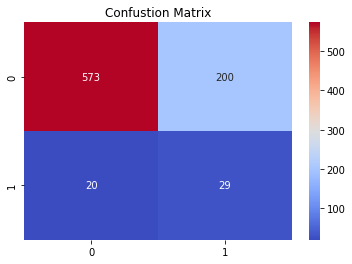

In [17]:
sns.heatmap(confusion_matrix(y_val, lr.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with 'balanced'

In [18]:
clf = lgb.LGBMClassifier(
learning_rate = 0.001,
    n_estimators = 1000,
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.5,
    reg_lambda = 0.5,
    importance_type= 'gain',
    class_weight = 'balanced',

)

clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)], early_stopping_rounds= 100,
       verbose=50, eval_metric= 'auc')


[50]	training's auc: 0.929776	training's binary_logloss: 0.675891	valid_1's auc: 0.749096	valid_1's binary_logloss: 0.67693
[100]	training's auc: 0.9326	training's binary_logloss: 0.659291	valid_1's auc: 0.747683	valid_1's binary_logloss: 0.661499
[150]	training's auc: 0.935499	training's binary_logloss: 0.644208	valid_1's auc: 0.74833	valid_1's binary_logloss: 0.647747
[200]	training's auc: 0.93772	training's binary_logloss: 0.630021	valid_1's auc: 0.752818	valid_1's binary_logloss: 0.634729
[250]	training's auc: 0.938576	training's binary_logloss: 0.616165	valid_1's auc: 0.751868	valid_1's binary_logloss: 0.622054
[300]	training's auc: 0.939996	training's binary_logloss: 0.603353	valid_1's auc: 0.752238	valid_1's binary_logloss: 0.610663


LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               importance_type='gain', learning_rate=0.001, n_estimators=1000,
               reg_alpha=0.5, reg_lambda=0.5, subsample=0.8)

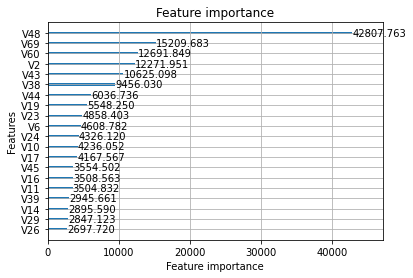

In [19]:
lgb.plot_importance(clf, max_num_features=20)

plt.show()

In [20]:
print('accuracy score: \n', accuracy_score(y_val, clf.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clf.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clf.predict(X_val)), '\n')

accuracy score: 
 0.8065693430656934 

auc score: 
 0.7532935554558174 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       773
           1       0.16      0.53      0.25        49

    accuracy                           0.81       822
   macro avg       0.56      0.68      0.57       822
weighted avg       0.92      0.81      0.85       822
 

confusion matrix 
 [[637 136]
 [ 23  26]] 



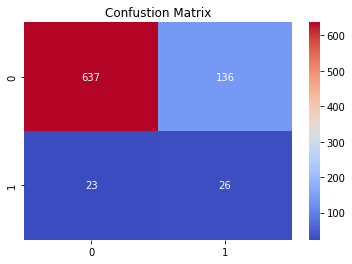

In [21]:
sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# LGBM with SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_tr, y_tr)

print('Before', Counter(y_train))
print('After', Counter(y_train_smt))

X_train_smt.head()

Before Counter({0: 3859, 1: 248})
After Counter({0: 3086, 1: 3086})


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,24,1,2,2,5,0,3,1,5,3,4,2,1,7,1,0,4,5,0,0,0,4,2,3,0,3,2,4,0,7,2,4,1,4,9,0,3,5,2,0,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,9,2,3,2,3,0,5,0,4,9,0,0,0,4,5,2,5,2,2,2,0,4,0,2,3,0,4,2,0,7,2,7,2,0,6,3,4,5,0,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,1,2,3,3,2,1,0,6,6,0,3,2,4,4,2,4,3,4,0,0,4,1,2,3,2,2,3,0,6,4,5,0,4,5,4,2,5,2,2,0,4,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,23,1,2,3,5,0,6,1,2,6,1,3,3,4,2,2,6,1,2,1,1,6,1,1,2,4,2,2,0,7,2,7,1,2,7,2,1,6,2,2,0,4,3,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,33,1,2,3,8,1,4,1,4,6,2,3,3,4,3,1,4,5,1,1,0,3,2,4,1,2,2,5,1,5,4,6,1,3,7,2,3,4,3,1,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
clfs = lgb.LGBMClassifier(
learning_rate = 0.001,
    n_estimators = 1000,
    subsample = 0.8,
    colsample_bytree = 0.5,
    reg_alpha = 0.5,
    reg_lambda = 0.5,
    importance_type= 'gain',


)

clfs.fit(X_train_smt, y_train_smt, eval_set = [(X_train_smt, y_train_smt),(X_val, y_val)], early_stopping_rounds= 100,
       verbose=50, eval_metric= 'auc')

[50]	training's auc: 0.969024	training's binary_logloss: 0.671667	valid_1's auc: 0.720662	valid_1's binary_logloss: 0.674389
[100]	training's auc: 0.969897	training's binary_logloss: 0.651259	valid_1's auc: 0.732463	valid_1's binary_logloss: 0.656553
[150]	training's auc: 0.971735	training's binary_logloss: 0.632002	valid_1's auc: 0.728661	valid_1's binary_logloss: 0.639874
[200]	training's auc: 0.973184	training's binary_logloss: 0.613961	valid_1's auc: 0.725625	valid_1's binary_logloss: 0.624398


LGBMClassifier(colsample_bytree=0.5, importance_type='gain',
               learning_rate=0.001, n_estimators=1000, reg_alpha=0.5,
               reg_lambda=0.5, subsample=0.8)

In [24]:
print('accuracy score: \n', accuracy_score(y_val, clfs.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clfs.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clfs.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clfs.predict(X_val)), '\n')

accuracy score: 
 0.8394160583941606 

auc score: 
 0.732489373498429 

classification report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       773
           1       0.13      0.31      0.19        49

    accuracy                           0.84       822
   macro avg       0.54      0.59      0.55       822
weighted avg       0.90      0.84      0.87       822
 

confusion matrix 
 [[675  98]
 [ 34  15]] 



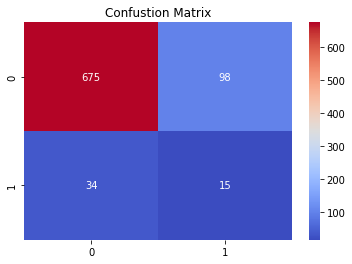

In [25]:
sns.heatmap(confusion_matrix(y_val, clfs.predict(X_val)), annot = True, cmap = 'coolwarm', fmt='g')
plt.title('Confustion Matrix')
plt.show()

# Submission

In [26]:
pred = (lr.predict_proba(X_test)[:,1] + clf.predict_proba(X_test)[:,1] +  clfs.predict_proba(X_test)[:,1])/3
pred = [1 if x>0.5 else 0 for x in pred]

sub.Predicted = pred
sub

,Id,Predicted
0,5,0
1,14,0
2,16,0
3,26,0
4,28,0
...,...,...
1710,5801,0
1711,5803,0
1712,5808,0
1713,5817,1


In [27]:
sub.Predicted.describe()

count    1715.000000
mean        0.281050
std         0.449643
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Predicted, dtype: float64